In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

### Loading the Dataset

In [2]:
df=pd.read_csv('Heart Attack.csv')
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [4]:
df.isna().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [33]:
### Converting target values to (0 & 1)

In [5]:
df['class']=df['class'].replace(to_replace='negative',value=0)
df['class']=df['class'].replace(to_replace='positive',value=1)

In [6]:
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0


<AxesSubplot:>

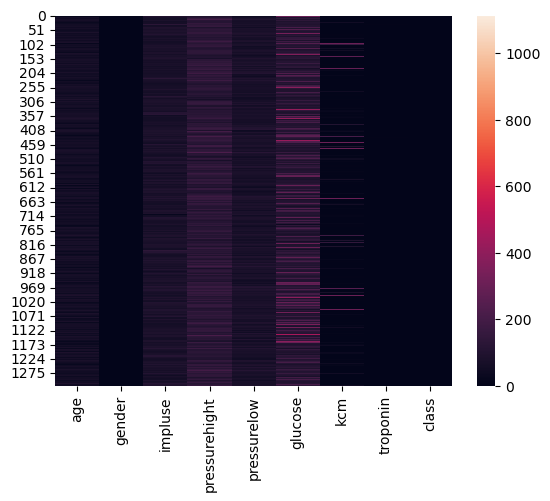

In [7]:
sns.heatmap(df)

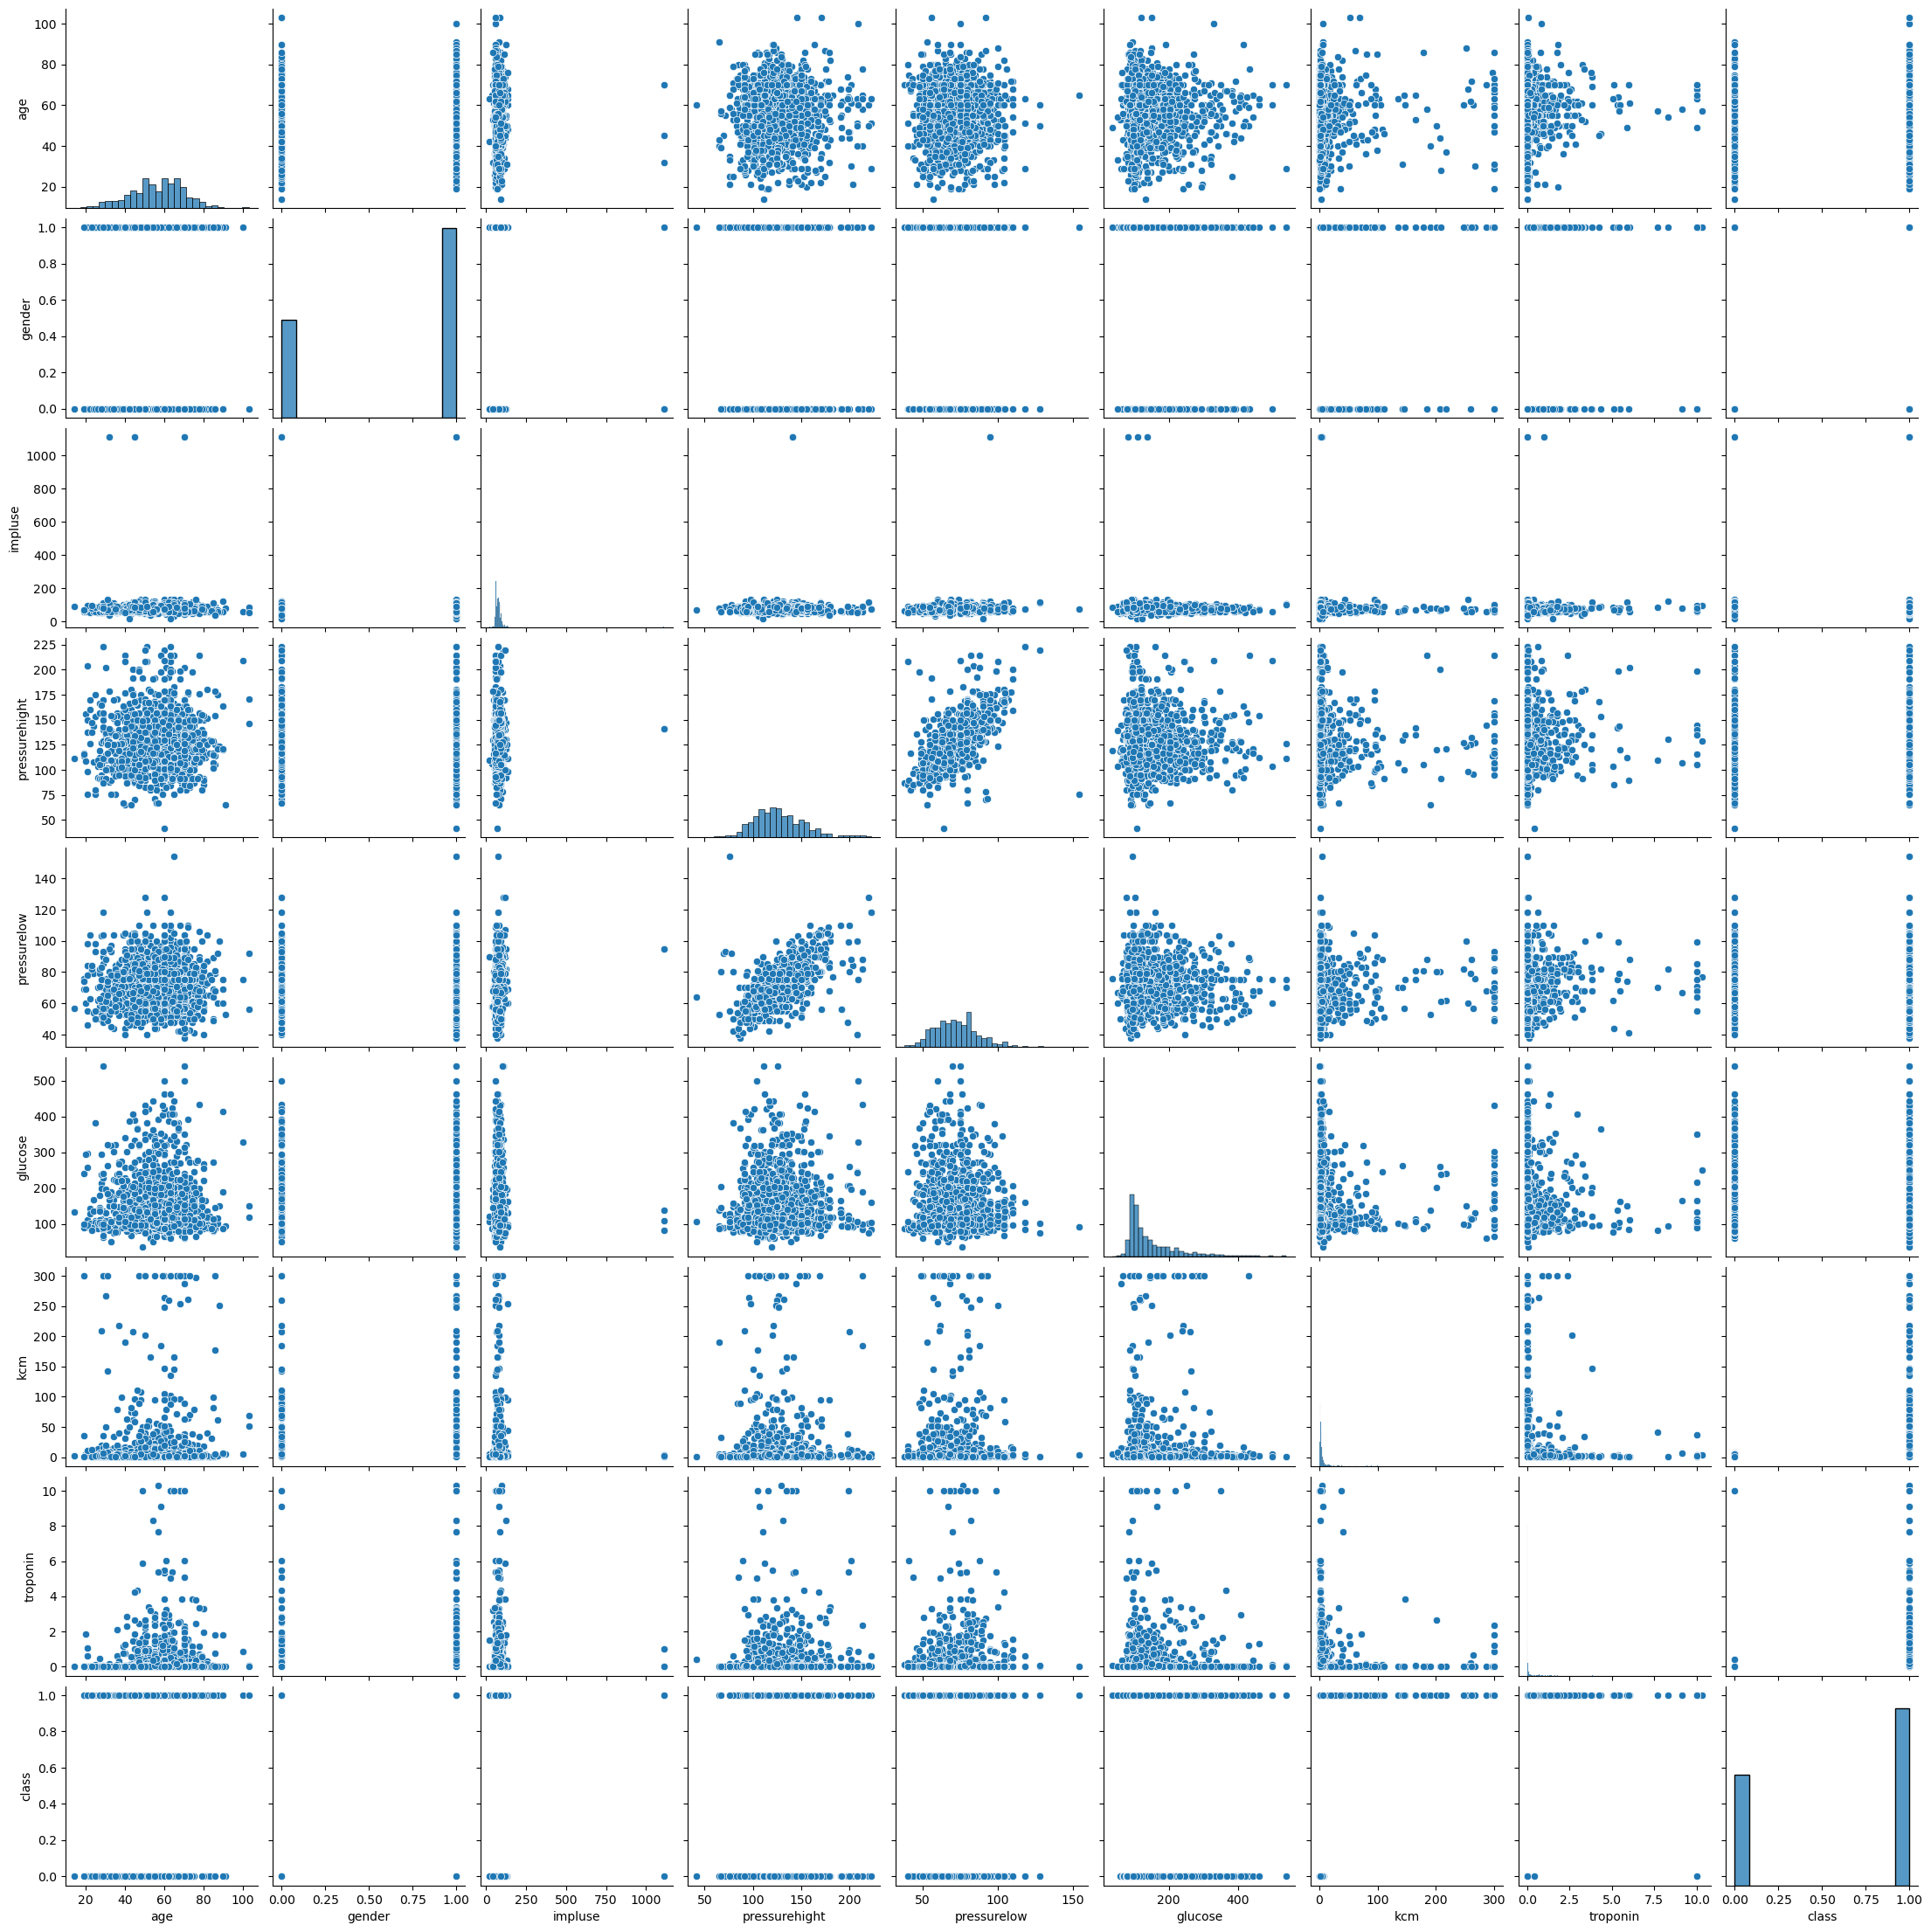

In [8]:
sns.pairplot(df)

### Splitting the dataset

In [12]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [13]:
x.shape,y.shape

((1319, 8), (1319,))

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
x_train.shape,x_test.shape

((1055, 8), (264, 8))

### LogisticRegression

In [20]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [23]:
model.score(x_train,y_train)

0.8199052132701422

In [25]:
pred_lg=model.predict(x_test)

In [29]:
acc_lg=accuracy_score(y_test,pred_lg)
acc_lg

0.7992424242424242

In [30]:
print(classification_report(y_test,pred_lg))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       101
           1       0.83      0.85      0.84       163

    accuracy                           0.80       264
   macro avg       0.79      0.78      0.79       264
weighted avg       0.80      0.80      0.80       264



In [31]:
print(confusion_matrix(y_test,pred_lg))

[[ 73  28]
 [ 25 138]]


### Decision Tree

In [43]:
model_dt=DecisionTreeClassifier(criterion='entropy',max_depth=3,)
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [44]:
model_dt.score(x_train,y_train)

0.9895734597156398

In [45]:
pred_dt=model_dt.predict(x_test)

In [46]:
acc_dt=accuracy_score(y_test,pred_dt)
acc_dt

0.9772727272727273

In [49]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       101
           1       0.99      0.98      0.98       163

    accuracy                           0.98       264
   macro avg       0.97      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



In [48]:
print(confusion_matrix(y_test,pred_dt))

[[ 99   2]
 [  4 159]]


## SVM

In [57]:
model_svm=SVC(kernel='rbf')
model_svm.fit(x_train,y_train)

SVC()

In [59]:
model_svm.score(x_train,y_train)

0.6834123222748815

In [60]:
pred_svm=model_svm.predict(x_test)

In [63]:
acc_svm=accuracy_score(y_test,pred_svm)
acc_svm

0.6931818181818182

In [64]:
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

           0       0.75      0.30      0.43       101
           1       0.68      0.94      0.79       163

    accuracy                           0.69       264
   macro avg       0.72      0.62      0.61       264
weighted avg       0.71      0.69      0.65       264



In [62]:
print(confusion_matrix(y_test,pred_svm))

[[ 30  71]
 [ 10 153]]


### Random Forest

In [75]:
model_rf=RandomForestClassifier(n_estimators=50,criterion='gini',max_depth=3)
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=50)

In [76]:
model_rf.score(x_train,y_train)

0.9886255924170616

In [77]:
pred_rf=model_rf.predict(x_test)

In [78]:
acc_rf=accuracy_score(y_test,pred_rf)
acc_rf

0.9810606060606061

In [79]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       101
           1       0.99      0.98      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



In [80]:
print(confusion_matrix(y_test,pred_rf))

[[ 99   2]
 [  3 160]]


## ALL ACCURACY

In [81]:
models=pd.DataFrame({'Model':['LR','DT','SVM','Rf'],
                     'Accuracy':[acc_lg,acc_dt,acc_svm,acc_rf]
                    })

In [82]:
models

,Model,Accuracy
0,LR,0.799242
1,DT,0.977273
2,SVM,0.693182
3,Rf,0.981061
